In [1]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
import os
import matplotlib.pyplot as plt

In [2]:
def data_gener(n, ro):
    #continious data
#     mu = np.array([5, 5, 10])
#     mu = np.array([1, 10, 100]) 
    mu = np.array([1, 100, 10000])
    Sigma = np.array([[1, ro, ro], [ro, 1, ro], [ro, ro, 1]])
    X_cont = np.random.multivariate_normal(mu, Sigma, size = n)

    return X_cont

In [3]:
#pd.DataFrame(data_gener(1000, cor), columns = ['Y1','Y2','X1'])

MAR, prop = 0.2, by Y1

In [4]:
propor = 0.2
corrs = np.arange(0.1, 1, 0.1)

df_bias_cc = pd.DataFrame(columns = ['full', 'MAR1', 'MAR2', 'MAR3', 'MAR4'])

for cor in corrs:
    
    n = 0
    df_means = pd.DataFrame(columns = ['mean_full', 'mean_MAR1', 'mean_MAR2', 'mean_MAR3', 'mean_MAR4'])

    for n in np.arange(100):

        X_full = data_gener(1000, cor)
        df_means.loc[n, 'mean_full'] = X_full[:,0].mean() 

        
        #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [0,1], 'weights': [0,0,1], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR1'] = cc['Y1'].mean() 


        #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [0], 'weights': [0,1,1], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR2'] = cc['Y1'].mean() 

        
        
        #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [1,2], 'weights': [1,0,0], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR3'] = cc['Y1'].mean() 
        
        
        #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [2], 'weights': [1,1,0], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR4'] = cc['Y1'].mean() 

        
    df_bias_cc.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
    df_bias_cc.loc[cor, 'MAR1'] = df_means['mean_MAR1'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR2'] = df_means['mean_MAR2'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR3'] = df_means['mean_MAR3'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR4'] = df_means['mean_MAR4'].mean() - df_means['mean_full'].mean()

    
df_bias_cc

,full,MAR1,MAR2,MAR3,MAR4
0.1,0.0,-0.01566,-0.022682,-0.172237,-0.128554
0.2,0.0,-0.033114,-0.044715,-0.169654,-0.133391
0.3,0.0,-0.054176,-0.063419,-0.171452,-0.139228
0.4,0.0,-0.071809,-0.083266,-0.17529,-0.145701
0.5,0.0,-0.085162,-0.100331,-0.172628,-0.149612
0.6,0.0,-0.106679,-0.114711,-0.174559,-0.158558
0.7,0.0,-0.12224,-0.131752,-0.174182,-0.160837
0.8,0.0,-0.138097,-0.144826,-0.173595,-0.164284
0.9,0.0,-0.156765,-0.163053,-0.174861,-0.170297


MU по итогу не влияет на bias

mu = np.array([1, 100, 10000])

<AxesSubplot:>

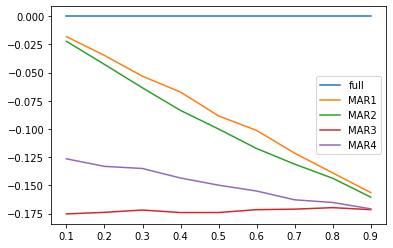

In [9]:
df_bias_cc.plot()

mu = np.array([1, 10, 100]) 

<AxesSubplot:>

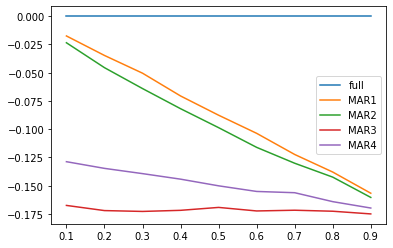

In [17]:
df_bias_cc.plot()

In [41]:
# mech = "MAR"
# mech+ str(2)

'MAR2'

TEST FUNC MAR

In [5]:
def MAR_ampute(param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias_cc = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'weights': [0,0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M1'] = cc[param].mean() 


            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'weights': [0,1,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M2'] = cc[param].mean() 



            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'weights': [1,0,0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M3'] = cc[param].mean() 


            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'weights': [1,1,0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M4'] = cc[param].mean() 


        df_bias_cc.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias_cc.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias_cc.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias_cc.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias_cc.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias_cc

Different MAR for one parameter: 

In [10]:
tmp_MAR_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.2, mech = "MAR")
tmp_MAR_Y2 = MAR_ampute(param = "Y2", num = 1, propor = 0.2, mech = "MAR")
tmp_MAR_X1 = MAR_ampute(param = "X1", num = 2, propor = 0.2, mech = "MAR")
tmp_MNAR_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
tmp_MNAR_Y2 = MAR_ampute(param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
tmp_MNAR_X1 = MAR_ampute(param = "X1", num = 2, propor = 0.2, mech = "MNAR")

2022-07-22 16:53:44,035 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,042 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,049 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,056 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,065 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,073 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,080 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you mean MAR+MNAR?
2022-07-22 16:53:44,088 [WARNING] Indicated weights for vars that are observed for a pattern with MNAR. Did you

<AxesSubplot:title={'center':'by X1'}>

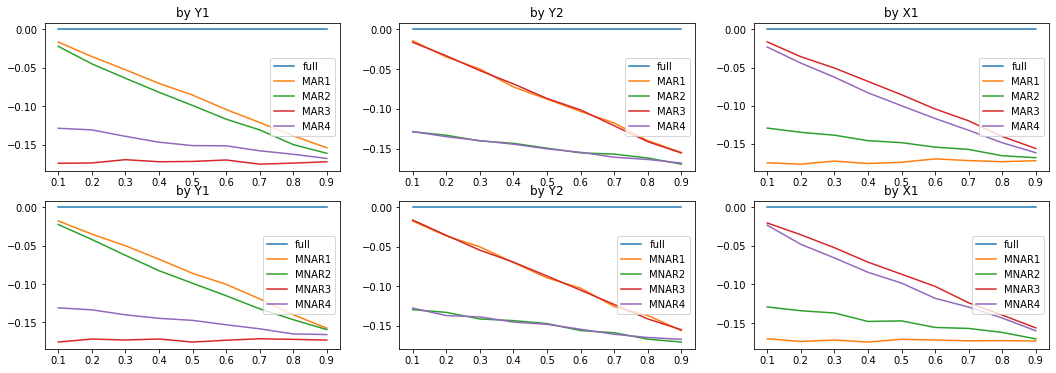

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,2 * 3))

tmp_MAR_Y1.plot(ax = axes[0,0], title = "by Y1")
tmp_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1")
tmp_MAR_Y2.plot(ax = axes[0,1], title = "by Y2")
tmp_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2")
tmp_MAR_X1.plot(ax = axes[0,2], title = "by X1")
tmp_MNAR_X1.plot(ax = axes[1,2], title = "by X1")

Расшифровка графиков:

График (1.1):
У нижней линии MAR3 pattern = [1 0 0]. => Вклад в потерю данных во 2 и 3 столбцах вносит только Y1. Получаем для всех строк WSS_i = y1_i. Далее выкидывается доля = prop строк с бОльшими wss. Таким образом, при анализе bias при подсчете среднего по Y1 после ампутаций в столбце Y1 потеряются самые большие значения, а значит среднее уменьшится. Так же оно будет ~постоянным не зависимо от cor.

Следующая кривая MAR4 находится чуть выше MAR3, поскольку вклад в wss дает еще и параметр Y2. С ростом cor bias увелисивается, поскольку данные становятся сильносвязанными, а значит при большем Y1 будет большее значение Y2 => будут выкидываться большие значения, и опять среднее будет больше отличаться от исходного. 

У кривых MAR1, MAR2 та же ситуация. В этих паттернах потеря не зависит от Y1. Получается, при малых cor с точки зрения Y1 значения теряются в общем то случайно (так как строки выбиваются с бОльшим wss, вклад в который дают Y2, X1), однако при увеличении cor начинают выбиваться и бОльшие значения Y1, поэтому bias и увеличивается.


График (1.2) by Y2:
Паттерна 0 1 0 среди приведенных выше нет, поэтому и нет горизонтальной кривой, как MAR3 на гр.(1). MAR2, MAR4 -- аналог MAR4 на гр.(1).

PROP = 0.4

In [6]:
tmp2_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.4, mech = "MAR")
tmp2_Y2 = MAR_ampute(param = "Y2", num = 1, propor = 0.4, mech = "MAR")
tmp2_X1 = MAR_ampute(param = "X1", num = 2, propor = 0.4, mech = "MAR")

All together

При увеличении prop графики сохраняют вид, меняется только размах bias

<AxesSubplot:title={'center':'by X1, prop = 0.4'}>

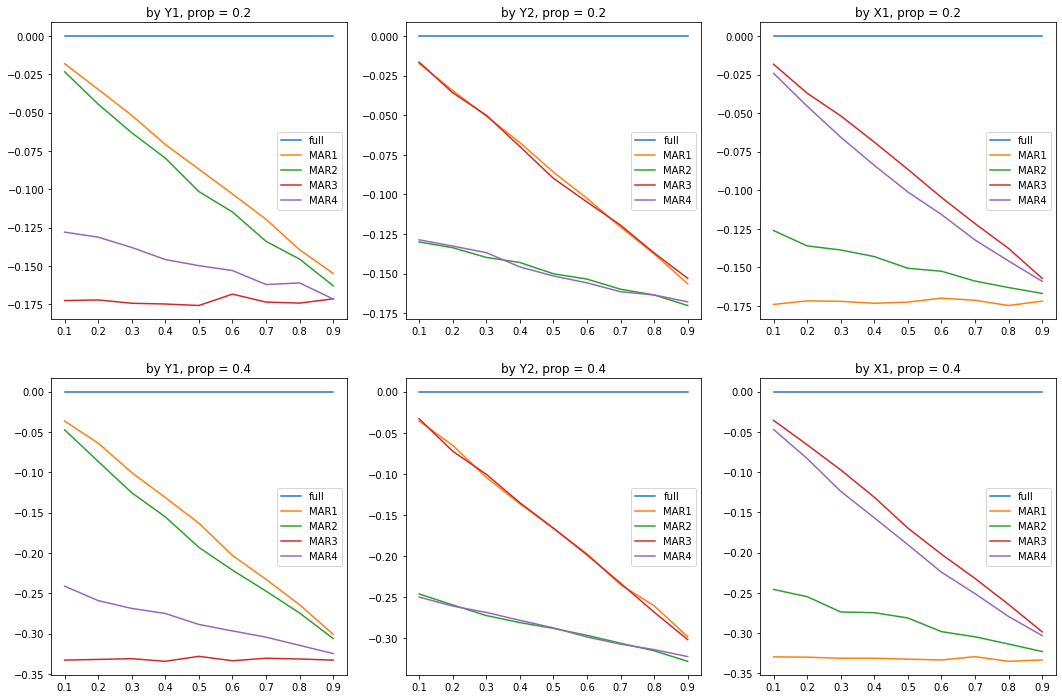

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,4 * 3))
#fig.tight_layout()

tmp_Y1.plot(ax = axes[0,0], title = "by Y1, prop = 0.2")
tmp_Y2.plot(ax = axes[0,1], title = "by Y2, prop = 0.2")
tmp_X1.plot(ax = axes[0,2], title = "by X1, prop = 0.2")
tmp2_Y1.plot(ax = axes[1,0], title = "by Y1, prop = 0.4")
tmp2_Y2.plot(ax = axes[1,1], title = "by Y2, prop = 0.4")
tmp2_X1.plot(ax = axes[1,2], title = "by X1, prop = 0.4")

In [10]:
def MAR_ampute_byAll(propor, varss, weights):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['byY1', 'byY2', 'byX1'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_fullY1', 'mean_byY1', 'mean_fullY2', 'mean_byY2', 'mean_fullX1', 'mean_byX1'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor) 

            
            df_means.loc[n, 'mean_fullY1'] = X_full[:,0].mean()
            df_means.loc[n, 'mean_fullY2'] = X_full[:,1].mean()
            df_means.loc[n, 'mean_fullX1'] = X_full[:,2].mean()
        
            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'weights': weights, 'mechanism': "MAR"} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            
            df_means.loc[n, 'mean_byY1'] = cc['Y1'].mean()
            df_means.loc[n, 'mean_byY2'] = cc['Y2'].mean() 
            df_means.loc[n, 'mean_byX1'] = cc['X1'].mean() 

            
 
        df_bias.loc[cor, 'byY1'] = df_means['mean_byY1'].mean() - df_means['mean_fullY1'].mean()
        df_bias.loc[cor, 'byY2'] = df_means['mean_byY2'].mean() - df_means['mean_fullY2'].mean()
        df_bias.loc[cor, 'byX1'] = df_means['mean_byX1'].mean() - df_means['mean_fullX1'].mean()

    return df_bias

In [11]:
pukkk = MAR_ampute_byAll(propor = 0.2, varss = [0,1], weights = [0,0,1])
pukkk

,byY1,byY2,byX1
0.1,-0.017441,-0.015986,-0.175563
0.2,-0.036153,-0.034966,-0.174337
0.3,-0.053133,-0.051923,-0.170994
0.4,-0.068726,-0.067171,-0.172326
0.5,-0.08675,-0.086273,-0.175879
0.6,-0.10231,-0.103188,-0.171984
0.7,-0.122054,-0.121084,-0.173593
0.8,-0.137428,-0.137897,-0.172996
0.9,-0.156694,-0.157431,-0.173848


In [22]:
MAR_ampute_001_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,1], weights = [0,0,1])
MAR_ampute_010_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,2], weights = [0,1,0])
MAR_ampute_100_02 = MAR_ampute_byAll(propor = 0.2, varss = [1,2], weights = [1,0,0])
MAR_ampute_011_02 = MAR_ampute_byAll(propor = 0.2, varss = [0], weights = [0,1,1])
MAR_ampute_101_02 = MAR_ampute_byAll(propor = 0.2, varss = [1], weights = [1,0,1])
MAR_ampute_110_02 = MAR_ampute_byAll(propor = 0.2, varss = [2], weights = [1,1,0])

In [23]:
MAR_ampute_001_06 = MAR_ampute_byAll(propor = 0.6, varss = [0,1], weights = [0,0,1])
MAR_ampute_010_06 = MAR_ampute_byAll(propor = 0.6, varss = [0,2], weights = [0,1,0])
MAR_ampute_100_06 = MAR_ampute_byAll(propor = 0.6, varss = [1,2], weights = [1,0,0])
MAR_ampute_011_06 = MAR_ampute_byAll(propor = 0.6, varss = [0], weights = [0,1,1])
MAR_ampute_101_06 = MAR_ampute_byAll(propor = 0.6, varss = [1], weights = [1,0,1])
MAR_ampute_110_06 = MAR_ampute_byAll(propor = 0.6, varss = [2], weights = [1,1,0])

<AxesSubplot:title={'center':'1 1 0, prop = 0.6'}>

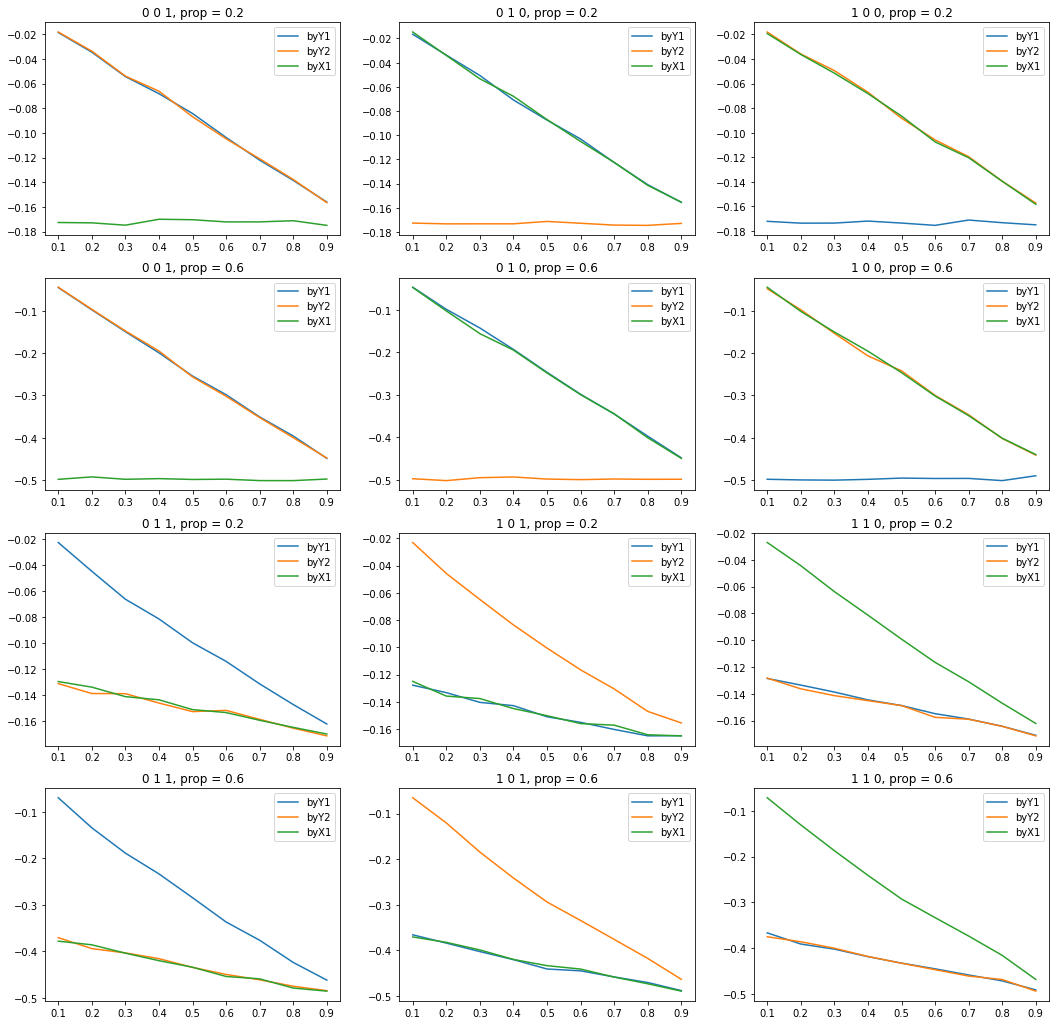

In [24]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6 * 3,6 * 3))
#fig.tight_layout()

MAR_ampute_001_02.plot(ax = axes[0,0], title = "0 0 1, prop = 0.2")
MAR_ampute_010_02.plot(ax = axes[0,1], title = "0 1 0, prop = 0.2")
MAR_ampute_100_02.plot(ax = axes[0,2], title = "1 0 0, prop = 0.2")
MAR_ampute_001_06.plot(ax = axes[1,0], title = "0 0 1, prop = 0.6")
MAR_ampute_010_06.plot(ax = axes[1,1], title = "0 1 0, prop = 0.6")
MAR_ampute_100_06.plot(ax = axes[1,2], title = "1 0 0, prop = 0.6")
MAR_ampute_011_02.plot(ax = axes[2,0], title = "0 1 1, prop = 0.2")
MAR_ampute_101_02.plot(ax = axes[2,1], title = "1 0 1, prop = 0.2")
MAR_ampute_110_02.plot(ax = axes[2,2], title = "1 1 0, prop = 0.2")
MAR_ampute_011_06.plot(ax = axes[3,0], title = "0 1 1, prop = 0.6")
MAR_ampute_101_06.plot(ax = axes[3,1], title = "1 0 1, prop = 0.6")
MAR_ampute_110_06.plot(ax = axes[3,2], title = "1 1 0, prop = 0.6")

При увеличении prop графики сохраняют вид, меняется только размах bias

Few pattern for one ampute

In [25]:
def ampute_fewPatterns(param, num, propor, pattern):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias_cc = pd.DataFrame(columns = ['full', 'Mech'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___mech with pattern 

            ma = MultivariateAmputation(
                patterns =  pattern,
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean'] = cc[param].mean() 



        df_bias_cc.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias_cc.loc[cor, 'Mech'] = df_means['mean'].mean() - df_means['mean_full'].mean()

    return df_bias_cc

In [28]:
MAR_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

tmp_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.2)

MNAR_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

<AxesSubplot:title={'center':'MNAR1+MNAR2+MNAR3+MNAR4 by Y1'}>

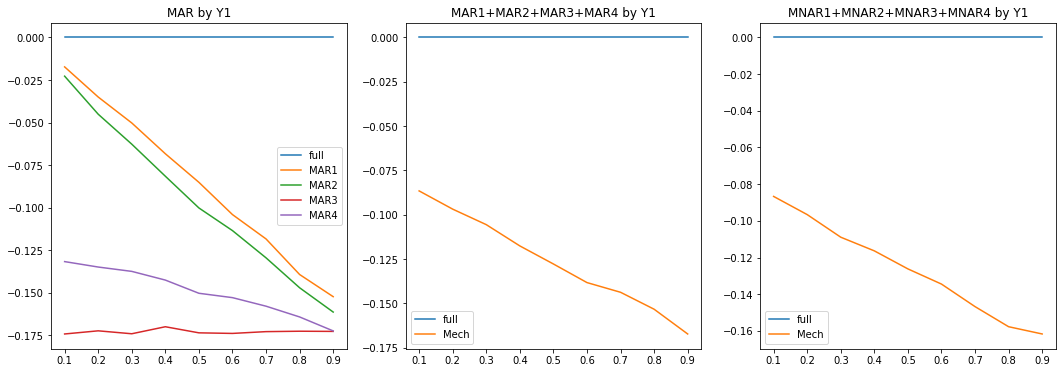

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(6 * 3,2 * 3))

tmp_Y1.plot(ax = axes[0], title = "MAR by Y1")
MAR_fewPatterns.plot(ax = axes[1], title = "MAR1+MAR2+MAR3+MAR4 by Y1")
MNAR_fewPatterns.plot(ax = axes[2], title = "MNAR1+MNAR2+MNAR3+MNAR4 by Y1")

In [31]:
MAR_MNAR_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MCAR_MAR_MNAR_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MCAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

<AxesSubplot:title={'center':'MAR+MNAR by Y1'}>

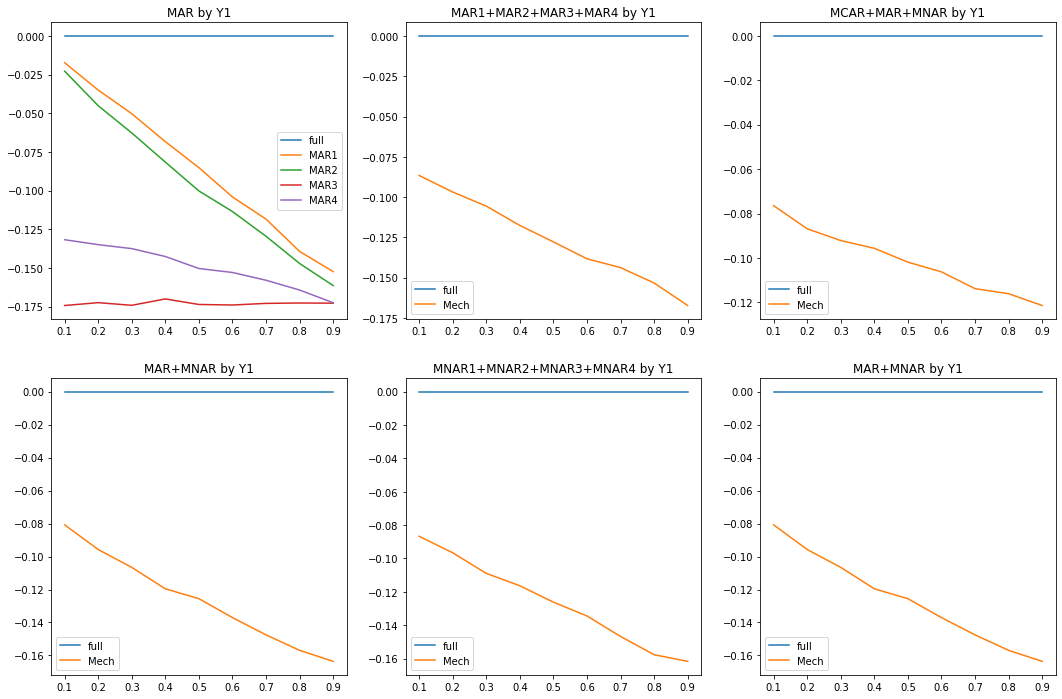

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,4 * 3))

tmp_Y1.plot(ax = axes[0,0], title = "MAR by Y1")
MAR_fewPatterns.plot(ax = axes[0,1], title = "MAR1+MAR2+MAR3+MAR4 by Y1")
MCAR_MAR_MNAR_fewPatterns.plot(ax = axes[0,2], title = "MCAR+MAR+MNAR by Y1")
MAR_MNAR_fewPatterns.plot(ax = axes[1,0], title = "MAR+MNAR by Y1")
MNAR_fewPatterns.plot(ax = axes[1,1], title = "MNAR1+MNAR2+MNAR3+MNAR4 by Y1")
MAR_MNAR_fewPatterns.plot(ax = axes[1,2], title = "MAR+MNAR by Y1")

In [173]:
MCAR_MAR_MNAR1_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MCAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

MCAR_MAR_MNAR2_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MCAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MCAR_MAR_MNAR3_fewPatterns =  ampute_fewPatterns('Y1', 0, 0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MCAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

<AxesSubplot:title={'center':'MCAR+MAR+MNAR 3 by Y1'}>

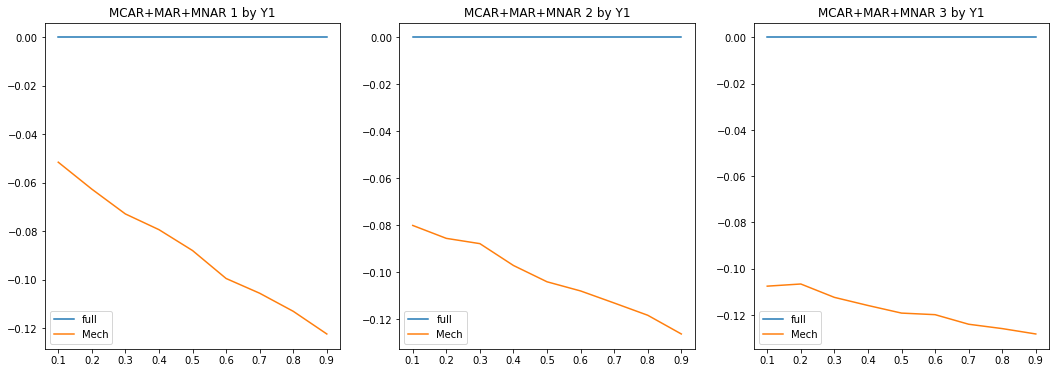

In [174]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(6 * 3,2 * 3))

MCAR_MAR_MNAR1_fewPatterns.plot(ax = axes[0], title = "MCAR+MAR+MNAR 1 by Y1")
MCAR_MAR_MNAR2_fewPatterns.plot(ax = axes[1], title = "MCAR+MAR+MNAR 2 by Y1")
MCAR_MAR_MNAR3_fewPatterns.plot(ax = axes[2], title = "MCAR+MAR+MNAR 3 by Y1") 